In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/reservations.csv
./data/reservations (1).csv
./data/reservations (2).csv
./data/airbnb-dummy-data-full.csv


## AirBnB Analysis Guide
1. From the host panel in the Desktop application, click 'Earnings'
2. Click 'View All Paid'
3. Click 'Get CSV Report'
4. For full functionality, do not tick off anything and instead Select All.

### Notes for the application proper
- Cache the dataset
- Ensure all the values are accounted for accordingly
- Do not send anything online; all locally-hosted
- Possible to rebuild the app three times (Streamlit, Django, Full-stack)

In [7]:
import os

bnb_df = pd.read_csv('./data/airbnb-dummy-data-full.csv', parse_dates=['Date', 'Arriving by date', 'Booking date', 'Start date', 'Earnings year'])
bnb_df['Earnings year'] = bnb_df['Earnings year'].dt.year

/var/folders/lf/hjjhjjj56lg0h0g75hbq_qb00000gp/T/ipykernel_72236/709398738.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bnb_df = pd.read_csv('./data/airbnb-dummy-data-full.csv', parse_dates=['Date', 'Arriving by date', 'Booking date', 'Start date', 'Earnings year'])
/var/folders/lf/hjjhjjj56lg0h0g75hbq_qb00000gp/T/ipykernel_72236/709398738.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bnb_df = pd.read_csv('./data/airbnb-dummy-data-full.csv', parse_dates=['Date', 'Arriving by date', 'Booking date', 'Start date', 'Earnings year'])
/var/folders/lf/hjjhjjj56lg0h0g75hbq_qb00000gp/T/ipykernel_72236/709398738.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling b

In [8]:
bnb_df

,Date,Arriving by date,Type,Confirmation code,Booking date,Start date,End date,Nights,Guest,Listing,...,Reference code,Currency,Amount,Paid out,Service fee,Fast pay fee,Cleaning fee,Gross earnings,Occupancy taxes,Earnings year
0,2023-12-15,2023-12-15,Reservation,HMKP9Q2R,2023-12-01,2023-12-16,12/30/23,14.0,Maria Garcia,Cozy Studio in Makati,...,rt45mp9kl2,PHP,15800,NaN,2370.0,158.0,1500.0,17300.0,1896.0,2023
1,2023-12-20,NaT,Payout,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,xy78nq3wv4,PHP,-1200,4500.0,NaN,NaN,NaN,NaN,NaN,2023
2,2023-12-25,NaT,Resolution Adjustment,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,ab12cd34ef,PHP,-500,NaN,NaN,NaN,NaN,NaN,NaN,2023
3,2023-12-28,2023-12-28,Reservation,HMRS5T8W,2023-12-15,2023-12-29,1/10/24,12.0,John Smith,Luxury Condo with City View,...,gh56jk78lm,PHP,18000,NaN,2700.0,180.0,1800.0,19800.0,2160.0,2023
4,2023-12-30,NaT,Resolution Payout,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,mn90pq12rs,PHP,800,NaN,NaN,NaN,NaN,NaN,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2024-04-30,NaT,Resolution Adjustment,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,uda77rst9s,PHP,-1340,NaN,NaN,NaN,NaN,NaN,NaN,2024
98,2024-12-26,NaT,Payout,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,37qdpey3qof,PHP,1593,2136.0,NaN,NaN,NaN,NaN,NaN,2024
99,2024-07-10,NaT,Resolution Payout,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,v4pwhxji57,PHP,1356,NaN,NaN,NaN,NaN,NaN,NaN,2024
100,2024-10-30,2024-10-30,Reservation,HM6PWFBU,2024-10-07,2024-10-31,11/18/24,18.0,Sarah Johnson,Cozy Studio in Makati,...,5njz7tiquiu,PHP,14322,NaN,2148.0,143.0,1115.0,15437.0,1719.0,2024


In [4]:
bnb_df['Details'].unique()

array(['Transfer to Juan Carlos Cruz, •••••0128 (PHP)', nan,
       'Resolution adjustment for resolution 37174975',
       'Resolution payout for resolution CLA-QMJWXRNCHD - Reservation HMDCED92AE',
       'Resolution payout for resolution CLA-XFBA4KSA34 - Reservation HMAHSSTZRB'],
      dtype=object)

In [5]:
reservations_bnb = bnb_df[bnb_df['Type'] == 'Reservation']
reservations_bnb

,Date,Arriving by date,Type,Confirmation code,Booking date,Start date,End date,Nights,Guest,Listing,...,Reference code,Currency,Amount,Paid out,Service fee,Fast pay fee,Cleaning fee,Gross earnings,Occupancy taxes,Earnings year
1,2025-01-28,NaT,Reservation,HM4Q5RXNA3,2025-01-21,2025-01-27,01/28/2025,1.0,Lalaine Madueño-Santos,Another Cozy 1BR Unit in Anonas,...,NaN,PHP,970.0,NaN,30.0,NaN,0.0,1000.0,0.0,2025.0
3,2025-01-27,NaT,Reservation,HMQTXCXCYT,2025-01-25,2025-01-26,02/01/2025,6.0,Macmac Dela Cruz,Single Bedroom In The Heart of Anonas,...,NaN,PHP,5820.0,NaN,180.0,NaN,0.0,6000.0,0.0,2025.0
5,2025-01-25,NaT,Reservation,HMZ83FX3QE,2025-01-06,2025-01-24,01/26/2025,2.0,Francis Aldrin Ramirez,Another Cozy 1BR Unit in Anonas,...,NaN,PHP,1940.0,NaN,60.0,NaN,0.0,2000.0,0.0,2025.0
7,2025-01-24,NaT,Reservation,HMTKYQ2M2F,2025-01-14,2025-01-23,01/26/2025,3.0,Denver Allam,Single Bedroom In The Heart of Anonas,...,NaN,PHP,2910.0,NaN,90.0,NaN,0.0,3000.0,0.0,2025.0
8,2025-01-24,NaT,Reservation,HMPM5JCWXD,2025-01-22,2025-01-23,01/26/2025,3.0,Macmac Dela Cruz,2BR Apartment Deep in Anonas,...,NaN,PHP,3492.0,NaN,108.0,NaN,0.0,3600.0,0.0,2025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2024-06-23,NaT,Reservation,HMZRJAKRXY,2024-06-15,2024-06-22,06/23/2024,1.0,Nico Andrew Francisco,Single Bedroom In The Heart of Anonas,...,NaN,PHP,970.0,NaN,30.0,NaN,0.0,1000.0,0.0,2024.0
192,2024-06-17,NaT,Reservation,HMRCSBABRM,2024-06-10,2024-06-16,06/17/2024,1.0,Jan Perez,Single Bedroom In The Heart of Anonas,...,NaN,PHP,970.0,NaN,30.0,NaN,0.0,1000.0,0.0,2024.0
194,2024-04-21,NaT,Reservation,HMRFMFJCK3,2024-04-14,2024-04-20,04/21/2024,1.0,Jan Elmo Angco,Single Bedroom In The Heart of Anonas,...,NaN,PHP,970.0,NaN,30.0,NaN,0.0,1000.0,0.0,2024.0
196,2024-04-10,NaT,Reservation,HMHA884DFB,2024-04-04,2024-04-09,04/15/2024,6.0,April Ann Lheia Roslin,Single Bedroom In The Heart of Anonas,...,NaN,PHP,5723.0,NaN,177.0,NaN,0.0,5900.0,0.0,2024.0


In [6]:
reservations_bnb.columns

Index(['Date', 'Arriving by date', 'Type', 'Confirmation code', 'Booking date',
       'Start date', 'End date', 'Nights', 'Guest', 'Listing', 'Details',
       'Reference code', 'Currency', 'Amount', 'Paid out', 'Service fee',
       'Fast pay fee', 'Cleaning fee', 'Gross earnings', 'Occupancy taxes',
       'Earnings year'],
      dtype='object')

In [7]:
grouped_units = reservations_bnb[['Listing', 'Nights', 'Amount', 'Guest']].groupby(by="Listing").agg({
    'Nights': ['sum', 'mean', 'max'],
    'Amount': ['sum', 'mean', 'max'],
    'Guest': ['nunique', 'count']
})
grouped_units

Nights                    Amount  \
                                         sum      mean   max       sum   
Listing                                                                  
2BR Apartment Deep in Anonas            43.0  2.388889  13.0   61847.2   
Another Cozy 1BR Unit in Anonas         81.0  1.620000  13.0   76630.0   
Single Bedroom In The Heart of Anonas  111.0  2.775000  25.0  103014.0   

                                                              Guest        
                                              mean      max nunique count  
Listing                                                                    
2BR Apartment Deep in Anonas           3435.955556  20428.2      16    18  
Another Cozy 1BR Unit in Anonas        1532.600000  11349.0      44    50  
Single Bedroom In The Heart of Anonas  2575.350000  21825.0      29    40

In [8]:
reservations_bnb.describe()

,Date,Arriving by date,Booking date,Start date,Nights,Amount,Paid out,Service fee,Fast pay fee,Cleaning fee,Gross earnings,Occupancy taxes,Earnings year
count,108,0,108,108,108.000000,108.000000,0.0,108.000000,0.0,108.0,108.000000,108.0,108.000000
mean,2024-10-31 07:33:20,NaT,2024-10-22 18:26:40,2024-10-30 05:06:40,2.175926,2236.029630,NaN,69.155556,NaN,0.0,2305.185185,0.0,2024.194444
min,2024-04-03 00:00:00,NaT,2024-03-22 00:00:00,2024-03-23 00:00:00,1.000000,679.000000,NaN,21.000000,NaN,0.0,700.000000,0.0,2024.000000
25%,2024-09-13 18:00:00,NaT,2024-09-09 18:00:00,2024-09-12 18:00:00,1.000000,970.000000,NaN,30.000000,NaN,0.0,1000.000000,0.0,2024.000000
50%,2024-11-23 00:00:00,NaT,2024-11-01 00:00:00,2024-11-22 00:00:00,1.000000,970.000000,NaN,30.000000,NaN,0.0,1000.000000,0.0,2024.000000
75%,2024-12-26 00:00:00,NaT,2024-12-16 06:00:00,2024-12-25 00:00:00,2.000000,2182.500000,NaN,67.500000,NaN,0.0,2250.000000,0.0,2024.000000
max,2025-01-28 00:00:00,NaT,2025-01-25 00:00:00,2025-01-27 00:00:00,25.000000,21825.000000,NaN,675.000000,NaN,0.0,22500.000000,0.0,2025.000000
std,NaN,NaN,NaN,NaN,2.953941,3017.574346,NaN,93.327042,NaN,0.0,3110.901387,0.0,0.397618


In [9]:
display(len(reservations_bnb))

108

In [10]:
# Repeat Guests?
repeat_counts = reservations_bnb['Guest'].value_counts()
repeat_counts = repeat_counts[repeat_counts > 1].index
reservations_bnb_repeat = reservations_bnb[reservations_bnb['Guest'].isin(repeat_counts)]
reservations_bnb_repeat

,Date,Arriving by date,Type,Confirmation code,Booking date,Start date,End date,Nights,Guest,Listing,...,Reference code,Currency,Amount,Paid out,Service fee,Fast pay fee,Cleaning fee,Gross earnings,Occupancy taxes,Earnings year
3,2025-01-27,NaT,Reservation,HMQTXCXCYT,2025-01-25,2025-01-26,02/01/2025,6.0,Macmac Dela Cruz,Single Bedroom In The Heart of Anonas,...,NaN,PHP,5820.0,NaN,180.0,NaN,0.0,6000.0,0.0,2025.0
8,2025-01-24,NaT,Reservation,HMPM5JCWXD,2025-01-22,2025-01-23,01/26/2025,3.0,Macmac Dela Cruz,2BR Apartment Deep in Anonas,...,NaN,PHP,3492.0,NaN,108.0,NaN,0.0,3600.0,0.0,2025.0
11,2025-01-21,NaT,Reservation,HMEKSZEXS4,2025-01-20,2025-01-20,01/23/2025,3.0,Macmac Dela Cruz,Single Bedroom In The Heart of Anonas,...,NaN,PHP,2910.0,NaN,90.0,NaN,0.0,3000.0,0.0,2025.0
13,2025-01-19,NaT,Reservation,HMNXR3JAD3,2024-12-22,2025-01-18,01/20/2025,2.0,Alon Vallespin,Another Cozy 1BR Unit in Anonas,...,NaN,PHP,1940.0,NaN,60.0,NaN,0.0,2000.0,0.0,2025.0
15,2025-01-18,NaT,Reservation,HMY2SDTFSP,2025-01-16,2025-01-17,01/21/2025,4.0,Katrina Mae Sabangan,2BR Apartment Deep in Anonas,...,NaN,PHP,1746.0,NaN,54.0,NaN,0.0,1800.0,0.0,2025.0
19,2025-01-18,NaT,Reservation,HMY2SDTFSP,2025-01-16,2025-01-17,01/21/2025,4.0,Katrina Mae Sabangan,2BR Apartment Deep in Anonas,...,NaN,PHP,5238.0,NaN,162.0,NaN,0.0,5400.0,0.0,2025.0
24,2025-01-13,NaT,Reservation,HMTMTPZEB3,2025-01-11,2025-01-12,01/13/2025,1.0,Shem Flores,Single Bedroom In The Heart of Anonas,...,NaN,PHP,776.0,NaN,24.0,NaN,0.0,800.0,0.0,2025.0
38,2024-12-29,NaT,Reservation,HM4DNS2AKJ,2024-12-25,2024-12-28,12/29/2024,1.0,Shem Flores,Single Bedroom In The Heart of Anonas,...,NaN,PHP,776.0,NaN,24.0,NaN,0.0,800.0,0.0,2024.0
46,2024-12-26,NaT,Reservation,HMPA8ARJHQ,2024-12-21,2024-12-25,12/26/2024,1.0,Jay Emmanuel Dador,Another Cozy 1BR Unit in Anonas,...,NaN,PHP,970.0,NaN,30.0,NaN,0.0,1000.0,0.0,2024.0
60,2024-12-17,NaT,Reservation,HMEA9XB3Q2,2024-11-19,2024-12-16,12/19/2024,3.0,Christian Ray Licen,Another Cozy 1BR Unit in Anonas,...,NaN,PHP,2910.0,NaN,90.0,NaN,0.0,3000.0,0.0,2024.0


In [11]:
# chart for repeat guests
grouped_repeats = reservations_bnb_repeat.groupby('Guest').agg({
    'Gross earnings': ['sum', 'mean'],
    'Confirmation code': 'count',
    'Nights': 'sum'
})
grouped_repeats_df = grouped_repeats.reset_index()
grouped_repeats_df

Guest Gross earnings              Confirmation code Nights
                                    sum         mean             count    sum
0         Alon Vallespin         3000.0  1500.000000                 2    3.0
1       Bernadette Braña         4500.0  1125.000000                 4    4.0
2        Carl Jeremy Gaa         2000.0  1000.000000                 2    2.0
3    Christian Ray Licen         6000.0  2000.000000                 3    6.0
4     Christine Kaye Ico         3000.0  1500.000000                 2    3.0
5     Jay Emmanuel Dador         2000.0  1000.000000                 2    2.0
6          Justin Pestio        14700.0  7350.000000                 2   16.0
7   Katrina Mae Sabangan         7200.0  3600.000000                 2    8.0
8       Macmac Dela Cruz        30900.0  3862.500000                 8   31.0
9     Maria Andrea Mateo         5400.0  2700.000000                 2    3.0
10      Rebecca Trinidad         5000.0  2500.000000                 2    5.0
11           Shem Flores         5700.0   814.285714                 7    7.0

In [12]:
grouped_repeats_df.columns

MultiIndex([(            'Guest',      ''),
            (   'Gross earnings',   'sum'),
            (   'Gross earnings',  'mean'),
            ('Confirmation code', 'count'),
            (           'Nights',   'sum')],
           )

In [13]:
grouped_repeats_df.columns = ['_'.join(col).strip('_') for col in grouped_repeats_df.columns.values]
grouped_repeats_df

,Guest,Gross earnings_sum,Gross earnings_mean,Confirmation code_count,Nights_sum
0,Alon Vallespin,3000.0,1500.000000,2,3.0
1,Bernadette Braña,4500.0,1125.000000,4,4.0
2,Carl Jeremy Gaa,2000.0,1000.000000,2,2.0
3,Christian Ray Licen,6000.0,2000.000000,3,6.0
4,Christine Kaye Ico,3000.0,1500.000000,2,3.0
5,Jay Emmanuel Dador,2000.0,1000.000000,2,2.0
6,Justin Pestio,14700.0,7350.000000,2,16.0
7,Katrina Mae Sabangan,7200.0,3600.000000,2,8.0
8,Macmac Dela Cruz,30900.0,3862.500000,8,31.0
9,Maria Andrea Mateo,5400.0,2700.000000,2,3.0


In [14]:
custom_names = {
    'Gross earnings_sum': 'total_earnings',
    'Gross earnings_mean': 'avg_earnings',
    'Confirmation code_count': 'count',
    'Nights_sum': 'total_nights'
}
renamed_grouped_repeats_df = grouped_repeats_df.rename(columns=custom_names)
renamed_grouped_repeats_df

,Guest,total_earnings,avg_earnings,count,total_nights
0,Alon Vallespin,3000.0,1500.000000,2,3.0
1,Bernadette Braña,4500.0,1125.000000,4,4.0
2,Carl Jeremy Gaa,2000.0,1000.000000,2,2.0
3,Christian Ray Licen,6000.0,2000.000000,3,6.0
4,Christine Kaye Ico,3000.0,1500.000000,2,3.0
5,Jay Emmanuel Dador,2000.0,1000.000000,2,2.0
6,Justin Pestio,14700.0,7350.000000,2,16.0
7,Katrina Mae Sabangan,7200.0,3600.000000,2,8.0
8,Macmac Dela Cruz,30900.0,3862.500000,8,31.0
9,Maria Andrea Mateo,5400.0,2700.000000,2,3.0


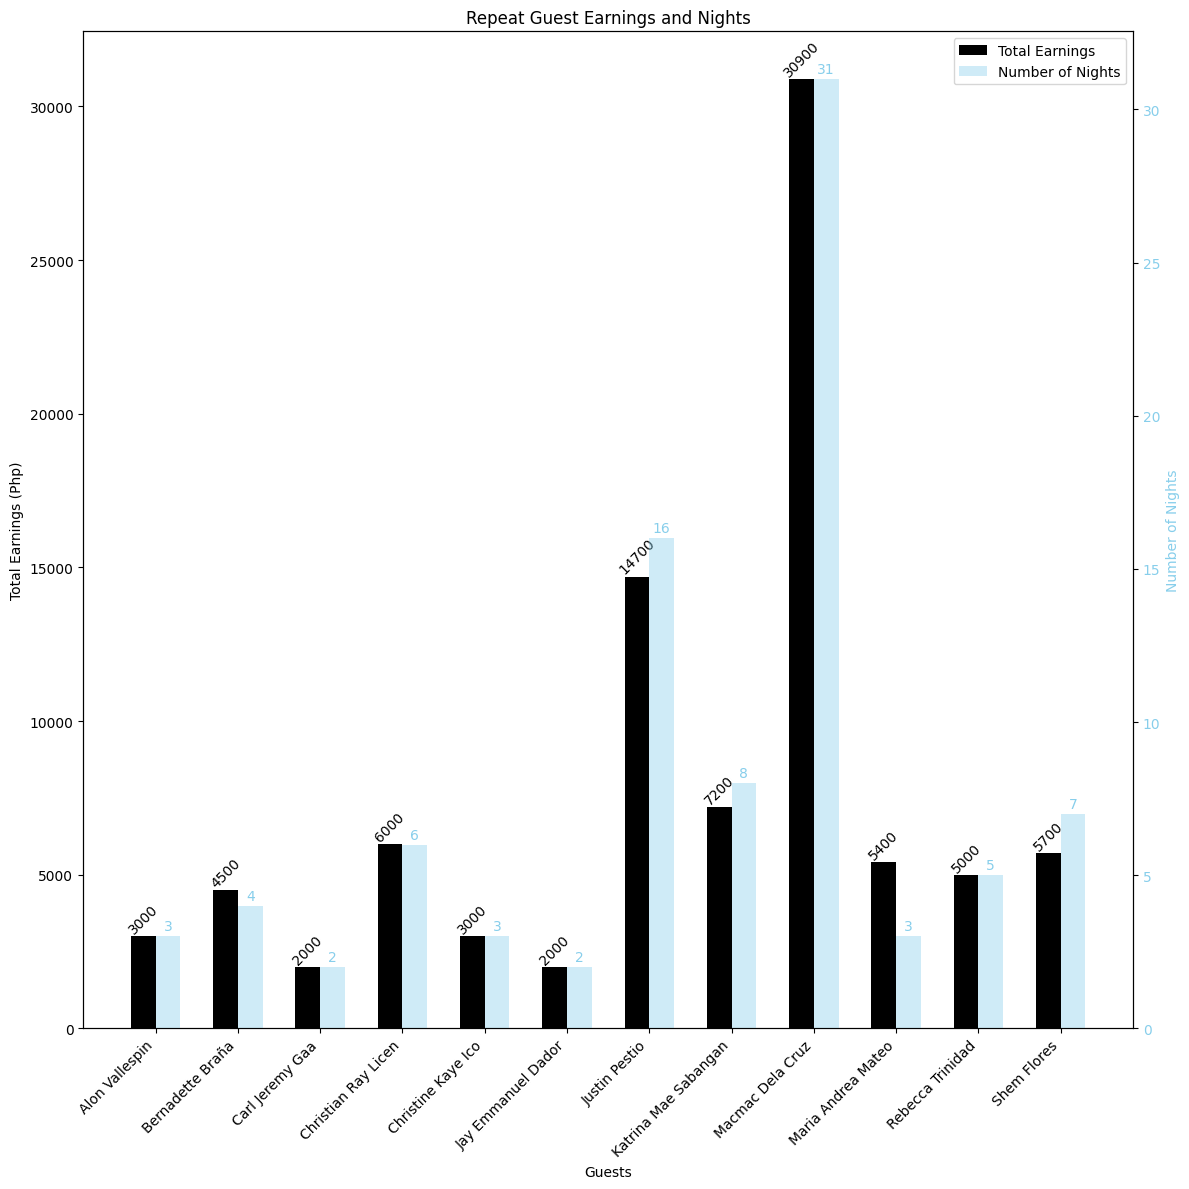

In [15]:
fig, ax1 = plt.subplots(figsize=(12,12))

# Set bar width and positions
bar_width = 0.3
x = np.arange(len(renamed_grouped_repeats_df['Guest']))

# Create the first axis for earnings
color1 = 'black'
ax1.bar(x - bar_width/2, renamed_grouped_repeats_df['total_earnings'], 
        width=bar_width, color=color1, label='Total Earnings')
ax1.set_xlabel('Guests')
ax1.set_ylabel('Total Earnings (Php)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Set x-ticks and rotate labels
ax1.set_xticks(x)
ax1.set_xticklabels(renamed_grouped_repeats_df['Guest'], rotation=45, ha='right')

# Create the second axis for nights
ax2 = ax1.twinx()
color2 = 'skyblue'
ax2.bar(x + bar_width/2, renamed_grouped_repeats_df['total_nights'], 
        width=bar_width, color=color2, alpha=0.4, label='Number of Nights')
ax2.set_ylabel('Number of Nights', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Add value labels on top of bars
for i, v in enumerate(renamed_grouped_repeats_df['total_earnings']):
    ax1.text(i - bar_width/2, v + 1, f'{v:.0f}', ha='center', va='bottom', color=color1, rotation=45)
for i, v in enumerate(renamed_grouped_repeats_df['total_nights']):
    ax2.text(i + bar_width/2, v + 0.1, str(int(v)), ha='center', va='bottom', color=color2)

# Add title and adjust legend
plt.title('Repeat Guest Earnings and Nights')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

# Analyze room behavior and days from booking
- Now that we have the data from ...

In [16]:
def get_booking_to_date(df: pd.DataFrame, per_room: bool = False):
    time_diff = df['Start date'] - df['Booking date']
    df['booking_to_date'] = time_diff / pd.Timedelta('1 days')
    return df
reservations_bnb = get_booking_to_date(bnb_df)
reservations_bnb[['Booking date', 'Guest', 'booking_to_date']].sort_values(by=['booking_to_date'], ascending=False).dropna(axis=0)

,Booking date,Guest,booking_to_date
54,2024-11-01,Venise Vhon,49.0
45,2024-11-16,Ernz Heredero,39.0
69,2024-11-01,Edz Estrera,39.0
182,2024-06-16,Regina Gabriela Decangchon,29.0
93,2024-10-26,Lyrah Doromal,28.0
...,...,...,...
176,2024-07-25,Maria Andrea Mateo,0.0
178,2024-07-24,Maria Andrea Mateo,0.0
137,2024-09-30,Macmac Dela Cruz,0.0
111,2024-10-21,Macmac Dela Cruz,0.0


Text(0.5, 1.0, 'Booking-to-date probability distribution')

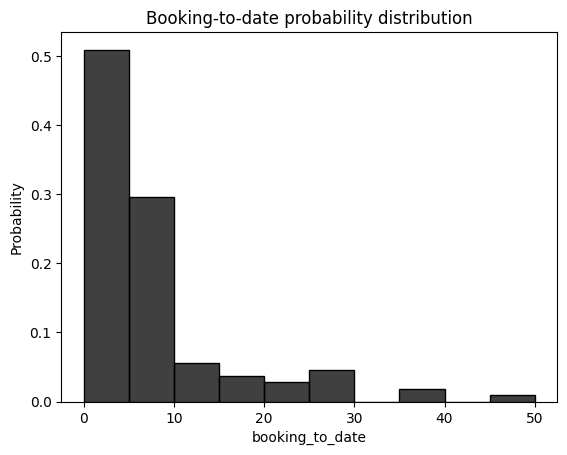

In [17]:
sns.histplot(reservations_bnb['booking_to_date'], stat='probability', bins=[0,5,10,15,20,25,30,35,40,45,50], color='black')
plt.title('Booking-to-date probability distribution')

Text(0.5, 1.0, 'Nights Reserved Distribution')

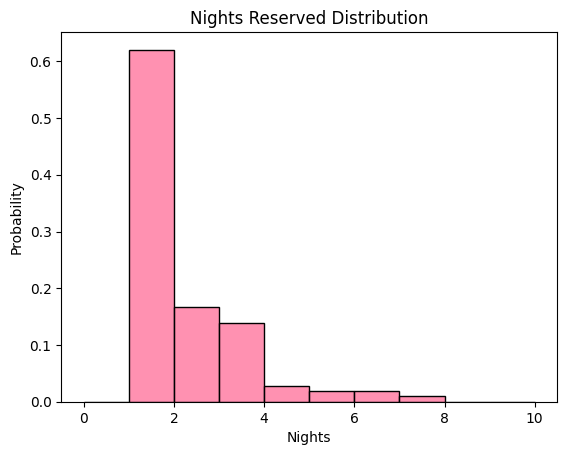

In [18]:
# Get night frequency
nights_series = reservations_bnb['Nights']
sns.histplot(nights_series, stat='probability', bins=[0,1,2,3,4,5,6,7,8,9,10], color='#FF6C97')
plt.title('Nights Reserved Distribution')

In [19]:
# Rename MultiIndex
new_col_names = [x[0] + '_' + x[1] for x in grouped_units.columns]
grouped_units.columns = new_col_names
grouped_units = grouped_units.reset_index()
grouped_units

,Listing,Nights_sum,Nights_mean,Nights_max,Amount_sum,Amount_mean,Amount_max,Guest_nunique,Guest_count
0,2BR Apartment Deep in Anonas,43.0,2.388889,13.0,61847.2,3435.955556,20428.2,16,18
1,Another Cozy 1BR Unit in Anonas,81.0,1.620000,13.0,76630.0,1532.600000,11349.0,44,50
2,Single Bedroom In The Heart of Anonas,111.0,2.775000,25.0,103014.0,2575.350000,21825.0,29,40


### Targets of this EDA
- Convert the aforementioned codes into the appropriate functions
- Extend the analysis found in a regular AirBnB report
- Explore implementing as a Streamlit app first, then recreate in Django, and then in JavaScript

In [138]:
import warnings
# Class: AirBnB
# assume all pertinent columns have been converted into their datetime equivalent

class AirBnB:
    def __init__(self, df: pd.DataFrame):
        """Initialize AirBnB class with a DataFrame"""
        if not isinstance(df, pd.DataFrame):
            raise TypeError("Input must be a pandas DataFrame")
        
        self.df = df
        self.filtered_df = None
        self.length = len(df)
        self.columns = df.columns

    def filter_type(self, type_value: str = None) -> pd.DataFrame:
        '''Filter based on values available in the Type column.
        
        Args:
            type_value (str): type value to filter by

        Returns:
            pd.DataFrame: filtered DataFrame

        Raises:
            ValueError: if type_value is invalid or not foudn in the DataFrame
        '''
        
        try:
            df = self.filtered_df if self.filtered_df is not None else self.df
            
            if type_value is None:
                raise ValueError("Type value cannot be None")
                
            if type_value not in df['Type'].unique():
                raise ValueError(f"Type '{type_value}' not found in available types: {df['Type'].unique().tolist()}")
                
            self.filtered_df = df[df['Type'] == type_value]
            return self.filtered_df
            
        except ValueError as v:
            print(f"Error: {str(v)}")
            return df  # Return original DataFrame on error
            
        except Exception as e:
            print(f"Unexpected error getting reservations: {str(e)}")
            return df  # Return original DataFrame on error


    def update_fiscal_year(self, fiscal_year: int | None = None) -> pd.DataFrame:
        try:
            if self.filtered_df is None:
                df = self.df
            else:
                df = self.filtered_df
                
            if fiscal_year is None:
                raise ValueError("Fiscal year cannot be None")

            if fiscal_year not in df['Earnings year'].unique():
                raise ValueError(f"No data found for fiscal year {fiscal_year}")
                
            self.filtered_df = df[df['Earnings year'] == fiscal_year]
            return self.filtered_Df
        except ValueError as v:
            print("No valid fiscal year found.")
        except Exception as e:
            print(e)

    # def get_unit_data(self):
    #     '''
    #         This method returns a df where the information is grouped according to unit data.
    #     '''
        
    #     try:

    #     except Exception as e:
            
    #     if self.fiscal_year

# reservations_bnb = bnb_df[bnb_df['Type'] == 'Reservation']
# reservations_bnb

In [140]:
test_x = AirBnB(bnb_df)
test_x.df

,Date,Arriving by date,Type,Confirmation code,Booking date,Start date,End date,Nights,Guest,Listing,...,Reference code,Currency,Amount,Paid out,Service fee,Fast pay fee,Cleaning fee,Gross earnings,Occupancy taxes,Earnings year
0,2025-01-28,2025-02-04,Payout,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,0MS1olA7hnQKdqmwZI7X9rGKwx6,PHP,NaN,970.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-28,NaT,Reservation,HM4Q5RXNA3,2025-01-21,2025-01-27,01/28/2025,1.0,Lalaine Madueño-Santos,Another Cozy 1BR Unit in Anonas,...,NaN,PHP,970.0,NaN,30.0,NaN,0.0,1000.0,0.0,2025.0
2,2025-01-27,2025-02-03,Payout,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,0MS1oeYx0QzrtQ2Vs2ZEhw6YrQF,PHP,NaN,5820.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-27,NaT,Reservation,HMQTXCXCYT,2025-01-25,2025-01-26,02/01/2025,6.0,Macmac Dela Cruz,Single Bedroom In The Heart of Anonas,...,NaN,PHP,5820.0,NaN,180.0,NaN,0.0,6000.0,0.0,2025.0
4,2025-01-25,2025-01-31,Payout,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,0MS1oWUeBkTPaaOJgxZEKElvPV3,PHP,NaN,1940.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2024-04-21,NaT,Reservation,HMRFMFJCK3,2024-04-14,2024-04-20,04/21/2024,1.0,Jan Elmo Angco,Single Bedroom In The Heart of Anonas,...,NaN,PHP,970.0,NaN,30.0,NaN,0.0,1000.0,0.0,2024.0
195,2024-04-10,2024-04-17,Payout,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,0MS1oXdzdyDCrf5BPNhunzo8Chx1,PHP,NaN,5723.0,NaN,NaN,NaN,NaN,NaN,NaN
196,2024-04-10,NaT,Reservation,HMHA884DFB,2024-04-04,2024-04-09,04/15/2024,6.0,April Ann Lheia Roslin,Single Bedroom In The Heart of Anonas,...,NaN,PHP,5723.0,NaN,177.0,NaN,0.0,5900.0,0.0,2024.0
197,2024-04-03,2024-04-09,Payout,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,0MS1okSKFCOB5KVffgo7O0AeRsD,PHP,NaN,970.0,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
test_x.df

,Date,Arriving by date,Type,Confirmation code,Booking date,Start date,End date,Nights,Guest,Listing,...,Reference code,Currency,Amount,Paid out,Service fee,Fast pay fee,Cleaning fee,Gross earnings,Occupancy taxes,Earnings year
1,2025-01-28,NaT,Reservation,HM4Q5RXNA3,2025-01-21,2025-01-27,01/28/2025,1.0,Lalaine Madueño-Santos,Another Cozy 1BR Unit in Anonas,...,NaN,PHP,970.0,NaN,30.0,NaN,0.0,1000.0,0.0,2025.0
3,2025-01-27,NaT,Reservation,HMQTXCXCYT,2025-01-25,2025-01-26,02/01/2025,6.0,Macmac Dela Cruz,Single Bedroom In The Heart of Anonas,...,NaN,PHP,5820.0,NaN,180.0,NaN,0.0,6000.0,0.0,2025.0
5,2025-01-25,NaT,Reservation,HMZ83FX3QE,2025-01-06,2025-01-24,01/26/2025,2.0,Francis Aldrin Ramirez,Another Cozy 1BR Unit in Anonas,...,NaN,PHP,1940.0,NaN,60.0,NaN,0.0,2000.0,0.0,2025.0
7,2025-01-24,NaT,Reservation,HMTKYQ2M2F,2025-01-14,2025-01-23,01/26/2025,3.0,Denver Allam,Single Bedroom In The Heart of Anonas,...,NaN,PHP,2910.0,NaN,90.0,NaN,0.0,3000.0,0.0,2025.0
8,2025-01-24,NaT,Reservation,HMPM5JCWXD,2025-01-22,2025-01-23,01/26/2025,3.0,Macmac Dela Cruz,2BR Apartment Deep in Anonas,...,NaN,PHP,3492.0,NaN,108.0,NaN,0.0,3600.0,0.0,2025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2024-06-23,NaT,Reservation,HMZRJAKRXY,2024-06-15,2024-06-22,06/23/2024,1.0,Nico Andrew Francisco,Single Bedroom In The Heart of Anonas,...,NaN,PHP,970.0,NaN,30.0,NaN,0.0,1000.0,0.0,2024.0
192,2024-06-17,NaT,Reservation,HMRCSBABRM,2024-06-10,2024-06-16,06/17/2024,1.0,Jan Perez,Single Bedroom In The Heart of Anonas,...,NaN,PHP,970.0,NaN,30.0,NaN,0.0,1000.0,0.0,2024.0
194,2024-04-21,NaT,Reservation,HMRFMFJCK3,2024-04-14,2024-04-20,04/21/2024,1.0,Jan Elmo Angco,Single Bedroom In The Heart of Anonas,...,NaN,PHP,970.0,NaN,30.0,NaN,0.0,1000.0,0.0,2024.0
196,2024-04-10,NaT,Reservation,HMHA884DFB,2024-04-04,2024-04-09,04/15/2024,6.0,April Ann Lheia Roslin,Single Bedroom In The Heart of Anonas,...,NaN,PHP,5723.0,NaN,177.0,NaN,0.0,5900.0,0.0,2024.0
